<h2 align=center><font size = 6 color="blue"> Project-Product Recommendation System-(Ratnesh Gupta) </font></h2>

<b><u>Domain</u>:</b>  E-commerce 

<b><u>Context</u>:</b> Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses  item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.   

<h3><u>Data Description:</u></h3><br>
Data columns- First three columns are ​ userId, productId, and ratings​ and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

#### Input variables: (Amazon Electronics Rating data)
1. UserId : Every user identified with a unique id 
2. ProductId : Every product identified with a unique id 
3. Rating : Rating of the corresponding product by the corresponding user
4. Timestamp : Time of the rating ( ignore this column for this exercise)


<h3><u>Source</u></h3><br> Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)
The repository has several datasets. For this case study, we are using the Electronics dataset.

<b> <u>Learning Outcomes </u> :</b>
- Exploratory Data Analysis
- Creating a Recommendation system using real data 
- Collaborative filtering


<b><u>Objective</u>:</b>  Build a recommendation system to recommend products to 
customers based on the their previous ratings for other 
products.

<b><u>Attribute Information </u> :</b>
    

<b><u>Steps and tasks​ - </u> :</b>

1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics) ( 3 Marks)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings ) -(5 Marks)
3. Build Popularity Recommender model. ( 15 marks)
4. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio) ( 2 marks)
5. Build Collaborative Filtering model. ( 20 marks)
6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models. ( 5 marks)
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. ( 10 marks)
8. Summarise your insights. ( 10 marks)

In [1]:
#OS library for setting directory path
import os
os.chdir("/home/ratnesh/Downloads/")

##  Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

### => Import the necessary libraries :

In [2]:
#Numpy for numerical calculation
import numpy as np  

#Panda library for loading data in Dataframe and working on Dataframe
import pandas as pd

#Matplotlib and Seaborn libraries for visualization of Dataframe
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

#Surprise library for building and analyzing recommender systems
from surprise import KNNWithMeans
from surprise import SVD, SVDpp
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV

#Time library for calculation of execution time
import time

<b>Comment :</b> 
- Here I have used numpy, pandas, matplotlib, seaborn for EDA and Data Visualization. 
- Also used Surprise library for data spliting, model building and for accuracy.
- GridSearchCV to find the best parameters.

# Exploratory Data Analysis ::

### => Read the data as a dataframe :- 

In [3]:
#importing data into Dataframe
df = pd.read_csv("ratings_Electronics.csv", names=["userId", "productId", "rating", "timestamp"])  

#First five line of Dataframe
df.head(10) 

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


<b>Comment:</b> Here I have read the Ratings Data using read_csv() function of pandas. df is a dataframe. I have used head() funtion to display first 5 records of the dataset.

In [4]:
df.tail(10)

,userId,productId,rating,timestamp
7824472,A5FUA9HEV2O42,BT008UKTMW,5.0,1405987200
7824473,A84WRQR47OOKR,BT008UKTMW,1.0,1401753600
7824474,A180UGKKYCPDH0,BT008UKTMW,5.0,1369353600
7824475,A2R6Q6KJCYSVH7,BT008UKTMW,3.0,1343520000
7824476,A2IGIIABRZ5LAB,BT008UKTMW,5.0,1356739200
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


### => Shape of the data :- 

In [5]:
#Shape of the Dataframe
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 7824482
Total Number of columns : 4


<b>Comment:</b> Shape of the dataframe is (7824482, 4).
There are 7824482 rows and 4 columns in the dataset.

### => Data type of each attribute :-

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [7]:
#Datatypes of attributes
df.dtypes

userId        object
productId     object
rating       float64
timestamp      int64
dtype: object

<b>Comment:</b> By displaying the datatypes of each variable we can see the following:

   -  int type           :  rating, timestamp
   -  object type(string):  userId, productId



### => Unique UserId and ProductID :-

In [8]:
#unique users avaialble in Data
unique_userId = df['userId'].nunique()

#unique products avaialble in Data
unique_productId = df['productId'].nunique()
print('Total number of unique Users    : ', unique_userId)
print('Total number of unique Products : ', unique_productId)


Total number of unique Users    :  4201696
Total number of unique Products :  476002


In [61]:
df.nunique()

userId       4201696
productId     476002
rating             5
dtype: int64

### => Checking the presence of missing values :-

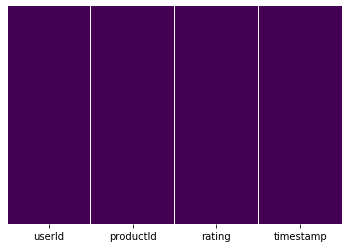

In [9]:
#checking missing values in Data by heatmap
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
#checking missing values in Data using lambda function
df.apply(lambda x : sum(x.isnull()))

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [11]:
#checking missing values using isnull() and sum() functions
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [12]:
#checking missing values using isna() and any() functions
#df.isnull().values.any()
df.isna().any()

userId       False
productId    False
rating       False
timestamp    False
dtype: bool

<b>Comment:</b> From above missing value graph we can see that there is no missing values which I have also checked bu using inull() and isna() function of dataframe.

### =>  Data Characteristics :-

In [13]:
df.describe()

,rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [14]:
#Statistics of Data (5 point Summary)
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
rating,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


<b>Comment : </b>  From above we can see that 
- Mean of rating is less than median which stats that the distribution is negatively skewed.
- Mean of timestamp is almost near to median which stats the distribution is symmetric.

### =>  Five point summary of  numerical attributes  :-

In [15]:
#5 point summary of Data
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
rating,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


### => Checking the presence of outliers :-

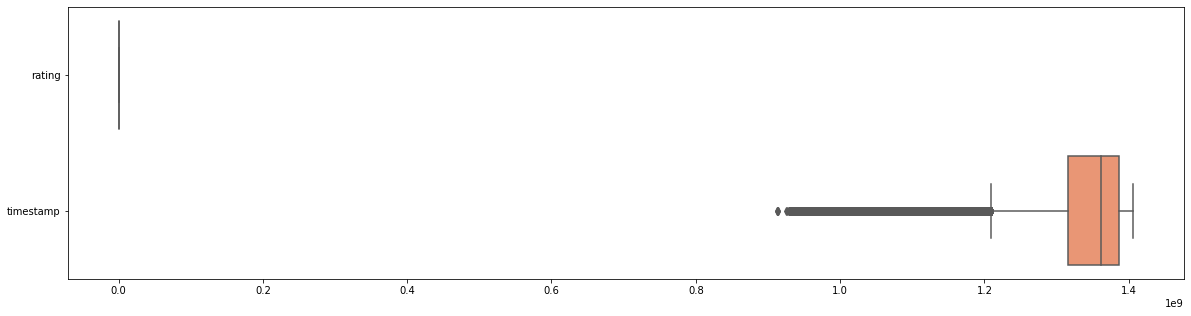

In [16]:
#Cheking outliers by boxplot

plt.figure(figsize=(20,5))
sns.boxplot(data=df, orient='h', palette='Set2', dodge=False)

<b>Observation : </b> From the above boxplot we can see that there are outliers in timestamp column. But I will not fixed the outliers as I will be dropping timestamp which is mentioned in the problem statement.

# Data Visualization ::

### =>  Pair plot that includes all the columns of the data frame :-

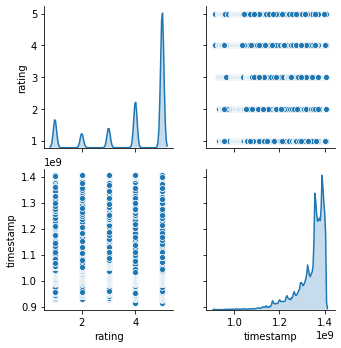

In [17]:
#Pairplot of Data
sns.pairplot(df, diag_kind= 'kde')

<b> Comment : </b> From above we can see there is tall tower of 5 rating which stats that most of the customers have given 5 rating. Very less customers have given 2 rating. From here we can infer an important thing that most of the electronics products are liked by the customers.

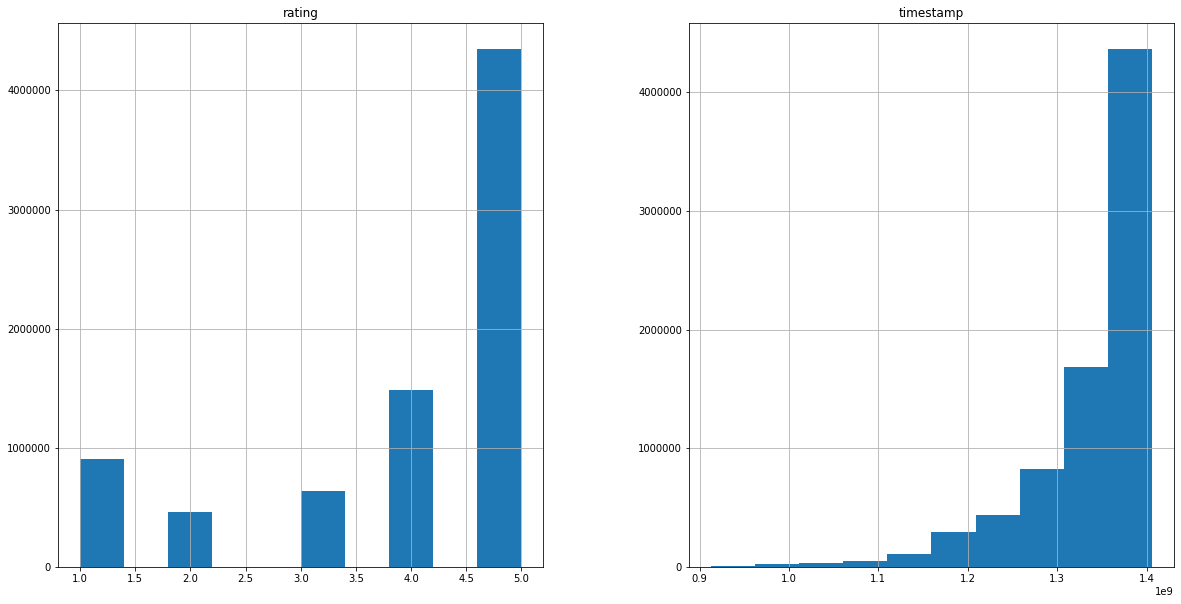

In [18]:
df.hist(figsize=(20, 10))
plt.show()

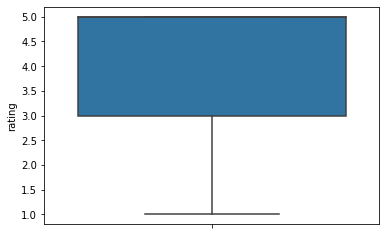

In [19]:
sns.boxplot(y='rating',data=df)

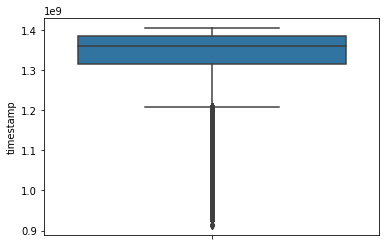

In [20]:
sns.boxplot(y='timestamp',data=df)

### => Checking the ratio of all 5 ratings

In [21]:
#counts of different ratings
df['rating'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: rating, dtype: int64

In [22]:
#Creating Dataframe for different ratings count
rating_counts = pd.DataFrame(df['rating'].value_counts()).reset_index()
rating_counts.columns = ['Labels', 'Ratings']
rating_counts

,Labels,Ratings
0,5.0,4347541
1,4.0,1485781
2,1.0,901765
3,3.0,633073
4,2.0,456322


<b>Comment:</b> Number of 1 ratings in our dataset is higher than 2 and 3 ratings. There are most number of people who have given 1 rating to the products. 
Below code shows the ration among them.

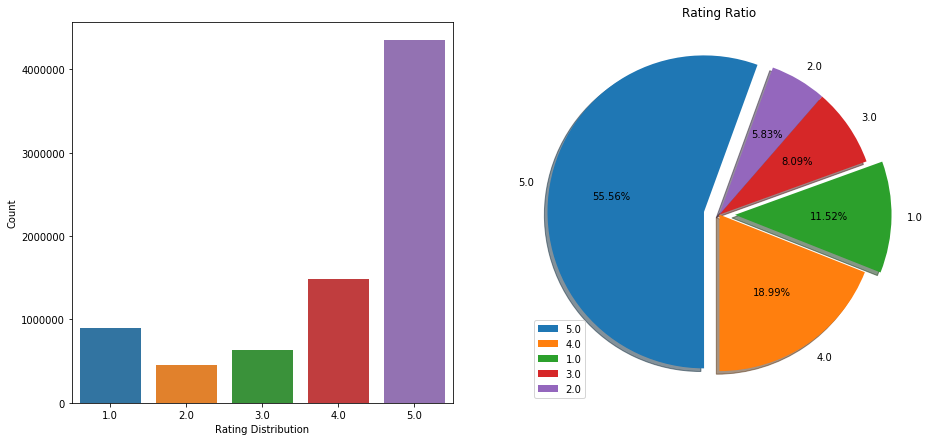

In [23]:
#visulization in bar chart and pie chart of different ratings counts 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.countplot(df['rating'], ax=ax1)
ax1.set_xlabel('Rating Distribution', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)


explode = (0.1, 0, 0.1, 0, 0)
ax2.pie(rating_counts["Ratings"], explode=explode, labels=rating_counts.Labels, autopct='%1.2f%%',
        shadow=True, startangle=70)
ax2.axis('equal')
plt.title("Rating Ratio")
plt.legend(rating_counts.Labels, loc=3)
plt.show()

<b>Observation :</b> From the barplot and pia chart we can clearly see that approx 55% of data have 5 rating followed by 4(approx 19%). Least number of people have given 2 rating. One important insight is coming from here that most of the products are liked by the customers.   

### => Creating and view the correlation matrix :-

In [24]:
#correlations between attributes
df.corr()

,rating,timestamp
rating,1.000000,0.041648
timestamp,0.041648,1.000000


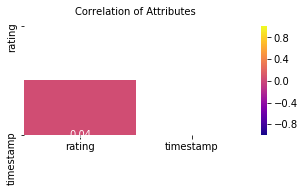

In [25]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5,2))
plt.title('Correlation of Attributes', y=1.05, size=10)
sns.heatmap(df.corr(),vmin=-1, cmap='plasma',annot=True,  mask=mask, fmt='.2f')

<b>Comment : </b> As we do not have many attributes and if we see the correlation between rating and timestamp then we won't find any high correlation between them.

#### Dropping timestamp :-

In [26]:
#Dropping timestamp column
df = df.drop(['timestamp'], axis=1)

Taking copy of dataframe df to df1 before doing any manupulation with dataset so to save loading time I have copied.

In [27]:
#Making a copy of Dataframe
df1 = df.copy()

In [28]:
df1.head()

,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# Taking a subset of the dataset to make it less sparse/ denser.( For example, keep the users only who has given 50 or more number of ratings ) ::-

#### => Taking Subset of users who have given 50 or more number of ratings :-

In [29]:
user_ratings_counts = df1['userId'].value_counts().rename('user_ratings_counts')

users_data   = df1.merge(user_ratings_counts.to_frame(),left_on='userId',right_index=True)

In [30]:
subset_df = users_data[users_data.user_ratings_counts >= 50]
subset_df.head()

,userId,productId,rating,user_ratings_counts
94,A3BY5KCNQZXV5U,0594451647,5.0,50
14863,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
134213,A3BY5KCNQZXV5U,B000063574,5.0,50
338368,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
634048,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


<b>Comment : </b> Above we can see only those users who have given 50 or more number of ratings.

#### => Taking Subset of products which have recieved 10 or more number of ratings to overcome the Grey Ship problem :-

In [31]:
product_ratings_counts = subset_df['productId'].value_counts().rename('product_ratings_counts')
product_ratings_data   = subset_df.merge(product_ratings_counts.to_frame(),left_on='productId',right_index=True)

In [32]:
product_ratings_data = product_ratings_data[product_ratings_data.product_ratings_counts >= 10]
product_ratings_data.head()

,userId,productId,rating,user_ratings_counts,product_ratings_counts
634048,A3BY5KCNQZXV5U,B0007Y794O,5.0,50,18
633970,AKT8TGIT6VVZ5,B0007Y794O,5.0,192,18
633944,A1ILWPH1GHUXE2,B0007Y794O,4.0,98,18
634073,A1ZM846Y7AUYD,B0007Y794O,4.0,77,18
633998,A2ED50E3KWKUKW,B0007Y794O,5.0,65,18


<b>Important : </b> Here I am considering only those products which recieved as least 10 ratings. Because there may be some cases where product's number of rating will be 1 or 2 but rating value will be 5, in this case these kind of products will be appear at top for the recommendation which would not be a good recommendation technique.    

In [33]:
amazon_df = product_ratings_data.copy()

In [34]:
panda_data = amazon_df.drop(['user_ratings_counts', 'product_ratings_counts'], axis=1)

In [35]:
print(panda_data.shape)
rows_count, columns_count = panda_data.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)
panda_data.head()

(42941, 3)
Total Number of rows : 42941
Total Number of columns : 3


,userId,productId,rating
634048,A3BY5KCNQZXV5U,B0007Y794O,5.0
633970,AKT8TGIT6VVZ5,B0007Y794O,5.0
633944,A1ILWPH1GHUXE2,B0007Y794O,4.0
634073,A1ZM846Y7AUYD,B0007Y794O,4.0
633998,A2ED50E3KWKUKW,B0007Y794O,5.0


In [ ]:
panda_data.nunique()

## Spliting the data randomly into train and test dataset. (Split it in 70/30 ratio) ::-

To load the dataset from a pandas dataframe, we will need the load_from_df() method. we will also need a reader obeject which I have I have already decleared. 

To Get top - K ( K = 5) recommendations I am initalizing k below.

In [36]:
k = 5

We need to define a Reader object for Surprise to be able to parse the dataframe.

In [37]:
reader = Reader(rating_scale=(1, 5))

surprise_data = Dataset.load_from_df(panda_data[['userId', 'productId', 'rating']], reader)

In [38]:
trainset, testset = train_test_split(surprise_data, test_size=.30, random_state=7)

# Building Popularity Recommender model ::- 

In two way I will be creating the Recommender model.
- Using mean of product rating
- Using Ranking Based Algorithm

## =>  Using mean of products rating :-

In [39]:
panda_data.groupby('productId')['rating'].mean().head()

productId
B00001P4XA    4.000000
B00001P4ZH    4.470588
B00001WRSJ    4.500000
B00001ZWXA    4.600000
B00004SABB    4.000000
Name: rating, dtype: float64

In [40]:
panda_data.groupby('productId')['rating'].mean().sort_values(ascending=False).head()

productId
B00L3YHF6O    5.0
B00006HSML    5.0
B001TH7GUA    5.0
B000IJY8DS    5.0
B005LDLP8W    5.0
Name: rating, dtype: float64

In [41]:
prod_ratings_count = pd.DataFrame(panda_data.groupby('productId')['rating'].mean().sort_values(ascending=False))
prod_ratings_count['prod_ratings_count'] = pd.DataFrame(panda_data.groupby('productId')['rating'].count())
prod_ratings_count.head(k)

,rating,prod_ratings_count
productId,,
B00L3YHF6O,5.0,14
B00006HSML,5.0,10
B001TH7GUA,5.0,17
B000IJY8DS,5.0,17
B005LDLP8W,5.0,16


In [42]:
basic_poplurity_model = prod_ratings_count.sort_values(by=['prod_ratings_count'], ascending=False)
basic_poplurity_model.head(k)

,rating,prod_ratings_count
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


<b>Comment : </b> Above is the list of top 5 popular products for the recommendation.

## => Ranking-Based Algorithms  :-

Creating a Product recommender :-

Building Popularity Recommender model(Non-personalised) :-

In [43]:
#Count of user_id for each unique song as recommendation score 
panda_data_grouped = panda_data.groupby('productId').agg({'userId': 'count'}).reset_index()
panda_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
panda_data_grouped.head()


,productId,score
0,B00001P4XA,12
1,B00001P4ZH,17
2,B00001WRSJ,16
3,B00001ZWXA,10
4,B00004SABB,13


In [44]:
#Sort the songs on recommendation score 
panda_data_sort = panda_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
panda_data_sort['Rank'] = panda_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = panda_data_sort.head(k) 
popularity_recommendations 

,productId,score,Rank
1592,B0088CJT4U,206,1.0
839,B003ES5ZUU,184,2.0
226,B000N99BBC,167,3.0
1552,B007WTAJTO,164,4.0
1577,B00829TIEK,149,5.0


#### Using popularity based recommender model to make predictions and find recommendations for random list of users with inferences

In [45]:
# UsINNG popularity based recommender model to make predictions
import warnings
warnings.filterwarnings('ignore')

def recommend(userId):     
    user_recommendations = popularity_recommendations 
          
    #Adding user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = userId 
      
    #Bringing user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [46]:
find_recom = [15,121,55,230,344]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

      userID   productId  score  Rank
1592      15  B0088CJT4U    206   1.0
839       15  B003ES5ZUU    184   2.0
226       15  B000N99BBC    167   3.0
1552      15  B007WTAJTO    164   4.0
1577      15  B00829TIEK    149   5.0


Here is the recommendation for the userId: 121

      userID   productId  score  Rank
1592     121  B0088CJT4U    206   1.0
839      121  B003ES5ZUU    184   2.0
226      121  B000N99BBC    167   3.0
1552     121  B007WTAJTO    164   4.0
1577     121  B00829TIEK    149   5.0


Here is the recommendation for the userId: 55

      userID   productId  score  Rank
1592      55  B0088CJT4U    206   1.0
839       55  B003ES5ZUU    184   2.0
226       55  B000N99BBC    167   3.0
1552      55  B007WTAJTO    164   4.0
1577      55  B00829TIEK    149   5.0


Here is the recommendation for the userId: 230

      userID   productId  score  Rank
1592     230  B0088CJT4U    206   1.0
839      230  B003ES5ZUU    184   2.0
226   

<b>Comment : </b> Top 5 popular products(B0088CJT4U, B003ES5ZUU, B000N99BBC, B007WTAJTO, B00829TIEK).
- Since this is a popularity-based recommender model, recommendations remain the same for all users. We predict the products based on the popularity. It is not personalized to particular user.

## Building Collaborative Filtering model ::-

For the Collaborative Filtering Model I am going to use <b>SVD, KNNWithMeans </b> and I will also test with other algorithm

In [47]:
cv_results = []  # to store cross validation result 

# Matrix Factorization Based Algorithms ::

### => Grid Search :-

Here I am Using grid search to find out the best hyper parameters for SVD and SVDpp Algorithm.
- n_epochs values : [20, 25] 
- lr_all          : [0.007, 0.009, 0.01]
- reg_all         : [0.4, 0.6]

In [48]:
svd_param_grid = {'n_epochs': [20, 25], 'lr_all': [0.007, 0.009, 0.01], 'reg_all': [0.4, 0.6]}

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
svdpp_gs = GridSearchCV(SVDpp, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)

svd_gs.fit(surprise_data)
svdpp_gs.fit(surprise_data)

# best RMSE score
print(svd_gs.best_score['rmse'])
print(svdpp_gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(svd_gs.best_params['rmse'])
print(svdpp_gs.best_params['rmse'])

0.8704916741700377
0.8715317590412368
{'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}
{'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}


<b>Comment : </b> Above we have found the best parameters for the SVD an SVDpp algorithm and we will be pass these parameters to while creating model.

### =>  SVD :-

In [49]:
start_time = time.time()

# Creating Model using best parameters
svd_model = SVD(n_epochs=20, lr_all=0.005, reg_all=0.2)

# Training the algorithm on the trainset
svd_model.fit(trainset)


# Predicting for test set
predictions_svd = svd_model.test(testset)

# Evaluating RMSE, MAE of algorithm SVD on 5 split(s) by cross validation
svd_cv = cross_validate(svd_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
svd_df = pd.DataFrame.from_dict(svd_cv)
svd_described = svd_df.describe()
cv_results = pd.DataFrame([['SVD', svd_described['test_rmse']['mean'], svd_described['test_mae']['mean'], 
                           svd_described['fit_time']['mean'], svd_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])


# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(predictions_svd, verbose=True)
print("=====================================================================")
computational_time = time.time() - start_time
print('\n Computational Time : %0.3fs' %(computational_time))
cv_results

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8751  0.9048  0.8649  0.8666  0.8604  0.8744  0.0159  
MAE (testset)     0.6476  0.6622  0.6383  0.6403  0.6398  0.6456  0.0089  
Fit time          2.10    2.12    2.04    2.01    2.01    2.05    0.05    
Test time         0.06    0.06    0.06    0.06    0.06    0.06    0.00    


==================== Model Evaluation ===============================
RMSE: 0.8808

 Computational Time : 13.098s


,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.874356,0.645638,2.054749,0.063246


<b> Comment :</b> Here we can see that the RMSE of testset and complete dataset found from cross_validation is amost same it seems our model is performing well on trainset and testset.

### => SVD++ :-

In [50]:
start_time = time.time()

# Creating Model using best parameters
svdpp_model = SVDpp(n_epochs=25, lr_all=0.01, reg_all=0.4)

# Training the algorithm on the trainset
svdpp_model.fit(trainset)


# Predicting for test set
predictions_svdpp = svdpp_model.test(testset)

# Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s) by cross validation
svdpp_cv = cross_validate(svdpp_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
svdpp_df = pd.DataFrame.from_dict(svdpp_cv)
svdpp_described = svdpp_df.describe()
svdpp_cv_results = pd.DataFrame([['SVDpp', svdpp_described['test_rmse']['mean'], svdpp_described['test_mae']['mean'], 
                           svdpp_described['fit_time']['mean'], svdpp_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(svdpp_cv_results, ignore_index=True)

# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(predictions_svdpp, verbose=True)
print("=====================================================================")
computational_time = time.time() - start_time
print('\n Computational Time : %0.3fs' %(computational_time))
cv_results


Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8793  0.8666  0.8652  0.8787  0.8665  0.8712  0.0063  
MAE (testset)     0.6464  0.6457  0.6406  0.6458  0.6404  0.6438  0.0027  
Fit time          22.48   23.01   22.73   21.97   23.90   22.82   0.64    
Test time         0.40    0.49    0.40    0.39    0.41    0.42    0.04    


==================== Model Evaluation ===============================
RMSE: 0.8771

 Computational Time : 135.812s


,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.874356,0.645638,2.054749,0.063246
1,SVDpp,0.871246,0.643800,22.819758,0.415092


# k-NN Based Algorithms ::

### => Grid Search :-

Here I am Using grid search to find out the best hyper parameters for <b>KNNBasic</b>, <b>KNNWithMeans</b> and <b>KNNWithZScore<b/> Algorithm.

In [51]:
start_time = time.time()

knn_param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]},
              'k': [15, 20, 25, 30, 40, 50, 60],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline']}
              }

knnbasic_gs = GridSearchCV(KNNBasic, knn_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs = GridSearchCV(KNNWithMeans, knn_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnz_gs     = GridSearchCV(KNNWithZScore, knn_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)


knnbasic_gs.fit(surprise_data)
knnmeans_gs.fit(surprise_data)
knnz_gs.fit(surprise_data)

# best RMSE score
print(knnbasic_gs.best_score['rmse'])
print(knnmeans_gs.best_score['rmse'])
print(knnz_gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(knnbasic_gs.best_params['rmse'])
print(knnmeans_gs.best_params['rmse'])
print(knnz_gs.best_params['rmse'])

computational_time = time.time() - start_time
print('\nComputational Time : %0.3fs' %(computational_time))

0.9630962180751871
0.9177731422767639
0.9209339481680565
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 60, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 60, 'sim_options': {'name': 'cosine', 'user_based': True}}
{'bsl_options': {'method': 'als', 'reg': 1}, 'k': 60, 'sim_options': {'name': 'cosine', 'user_based': True}}

Computational Time : 862.232s


### => KNNBasic :-

In [52]:
start_time = time.time()

# Creating Model using best parameters
knnBasic_model = KNNBasic(k=50, sim_options={'name': 'cosine', 'user_based': False})

# Training the algorithm on the trainset
knnBasic_model.fit(trainset)

# Predicting for test set
prediction_knnBasic = knnBasic_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s)
knnBasic_cv = cross_validate(knnBasic_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
knnBasic_df = pd.DataFrame.from_dict(knnBasic_cv)
knnBasic_described = knnBasic_df.describe()
knnBasic_cv_results = pd.DataFrame([['KNNBasic', knnBasic_described['test_rmse']['mean'], knnBasic_described['test_mae']['mean'], 
                           knnBasic_described['fit_time']['mean'], knnBasic_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(knnBasic_cv_results, ignore_index=True)

# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnBasic, verbose=True)
print("=====================================================================")

computational_time = time.time() - start_time
print('\n Computational Time : %0.3fs' %(computational_time))
cv_results


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9822  0.9798  0.9692  0.9741  0.9902  0.9791  0.0072  
MAE (testset)     0.6979  0.6967  0.6910  0.6927  0.7037  0.6964  0.0045  
Fit time          0.78    0.81    0.82    0.81    0.81    0.81    0.01    
Test time         0.47    0.48    0.47    0.46    0.54    0.48    0.03    


==================== Model Evaluation ===============================
RMSE: 1.0018

 Computational Time : 8.

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.874356,0.645638,2.054749,0.063246
1,SVDpp,0.871246,0.643800,22.819758,0.415092
2,KNNBasic,0.979076,0.696389,0.807133,0.482763


### => KNNWithZScore :-

In [53]:
start_time = time.time()

# Creating Model using best parameters
knnZscore_model = KNNWithZScore(k=60, sim_options={'name': 'cosine', 'user_based': False})

# Training the algorithm on the trainset
knnZscore_model.fit(trainset)

# Predicting for testset
prediction_knnZscore = knnZscore_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s)
knnZscore_cv = cross_validate(knnZscore_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
knnZscore_df = pd.DataFrame.from_dict(knnZscore_cv)
knnZscore_described = knnZscore_df.describe()
knnZscore_cv_results = pd.DataFrame([['KNNWithZScore', knnZscore_described['test_rmse']['mean'], knnZscore_described['test_mae']['mean'], 
                           knnZscore_described['fit_time']['mean'], knnZscore_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(knnZscore_cv_results,ignore_index=True)

# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnZscore, verbose=True)
print("=====================================================================")

computational_time = time.time() - start_time
print('\n Computational Time : %0.3fs' %(computational_time))
cv_results


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9369  0.9296  0.9367  0.9494  0.9139  0.9333  0.0116  
MAE (testset)     0.6553  0.6480  0.6489  0.6587  0.6371  0.6496  0.0074  
Fit time          0.90    0.91    0.91    0.91    0.91    0.91    0.00    
Test time         0.53    0.52    0.52    0.63    0.51    0.54    0.04    


==================== Model Evaluation ===============================
RMSE: 0.9541

 Computational Time

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.874356,0.645638,2.054749,0.063246
1,SVDpp,0.871246,0.643800,22.819758,0.415092
2,KNNBasic,0.979076,0.696389,0.807133,0.482763
3,KNNWithZScore,0.933315,0.649573,0.909765,0.544317


### => KNNWithMeans User-User 

In [54]:
start_time = time.time()

# Creating Model using best parameters
knnMeansUU_model = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'user_based': True})

# Training the algorithm on the trainset
knnMeansUU_model.fit(trainset)

# Predicting for testset
prediction_knnMeansUU = knnMeansUU_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNWithMeans User-User on 5 split(s)
knnMeansUU_cv = cross_validate(knnMeansUU_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


# Storing Crossvalidation Results in dataframe
knnMeansUU_df = pd.DataFrame.from_dict(knnMeansUU_cv)
knnMeansUU_described = knnMeansUU_df.describe()
knnMeansUU_cv_results = pd.DataFrame([['KNNWithMeans User-User', knnMeansUU_described['test_rmse']['mean'], knnMeansUU_described['test_mae']['mean'], 
                           knnMeansUU_described['fit_time']['mean'], knnMeansUU_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(knnMeansUU_cv_results, ignore_index=True)

# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnMeansUU, verbose=True)
print("=====================================================================")

computational_time = time.time() - start_time
print('\n Computational Time : %0.3fs' %(computational_time))
cv_results


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9223  0.9178  0.9192  0.9043  0.9053  0.9138  0.0075  
MAE (testset)     0.6455  0.6477  0.6456  0.6366  0.6325  0.6416  0.0059  
Fit time          0.48    0.45    0.45    0.45    0.44    0.45    0.01    
Test time         0.36    0.37    0.37    0.47    0.37    0.39    0.04    


==================== Model Evaluation ===============================
RMSE: 0.9364

 Computational Time 

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.874356,0.645638,2.054749,0.063246
1,SVDpp,0.871246,0.643800,22.819758,0.415092
2,KNNBasic,0.979076,0.696389,0.807133,0.482763
3,KNNWithZScore,0.933315,0.649573,0.909765,0.544317
4,KNNWithMeans User-User,0.913782,0.641577,0.454319,0.388642


### => KNNWithMeans Item-Item 

In [55]:
start_time = time.time()

# Creating Model using best parameters
knnMeansII_model = KNNWithMeans(k=60, sim_options={'name': 'cosine', 'user_based': False})

# Training the algorithm on the trainset
knnMeansII_model.fit(trainset)

# Predicting for testset
prediction_knnMeansII = knnMeansII_model.test(testset)

# Evaluating RMSE, MAE of algorithm KNNWithMeans Item-Item on 5 split(s)
knnMeansII_cv = cross_validate(knnMeansII_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Storing Crossvalidation Results in dataframe
knnMeansII_df = pd.DataFrame.from_dict(knnMeansII_cv)
knnMeansII_described = knnMeansII_df.describe()
knnMeansII_cv_results = pd.DataFrame([['KNNWithMeans Item-Item', knnMeansII_described['test_rmse']['mean'], knnMeansII_described['test_mae']['mean'], 
                           knnMeansII_described['fit_time']['mean'], knnMeansII_described['test_time']['mean']]],
                            columns = ['Model', 'RMSE', 'MAE', 'Fit Time', 'Test Time'])

cv_results = cv_results.append(knnMeansII_cv_results, ignore_index=True)

# get RMSE
print("\n\n==================== Model Evaluation ===============================")
accuracy.rmse(prediction_knnMeansII, verbose=True)
print("=====================================================================")

computational_time = time.time() - start_time
print('\n Computational Time : %0.3fs' %(computational_time))
cv_results


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9369  0.9184  0.9274  0.9095  0.9268  0.9238  0.0093  
MAE (testset)     0.6614  0.6427  0.6516  0.6388  0.6528  0.6494  0.0080  
Fit time          0.81    0.82    0.80    0.87    0.83    0.82    0.02    
Test time         0.51    0.48    0.49    0.61    0.48    0.51    0.05    


==================== Model Evaluation ===============================
RMSE: 0.9450

 Computational Time 

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.874356,0.645638,2.054749,0.063246
1,SVDpp,0.871246,0.643800,22.819758,0.415092
2,KNNBasic,0.979076,0.696389,0.807133,0.482763
3,KNNWithZScore,0.933315,0.649573,0.909765,0.544317
4,KNNWithMeans User-User,0.913782,0.641577,0.454319,0.388642
5,KNNWithMeans Item-Item,0.923825,0.649447,0.824487,0.511338


##  Comparison of all algorithms on RMSE and MAE ::

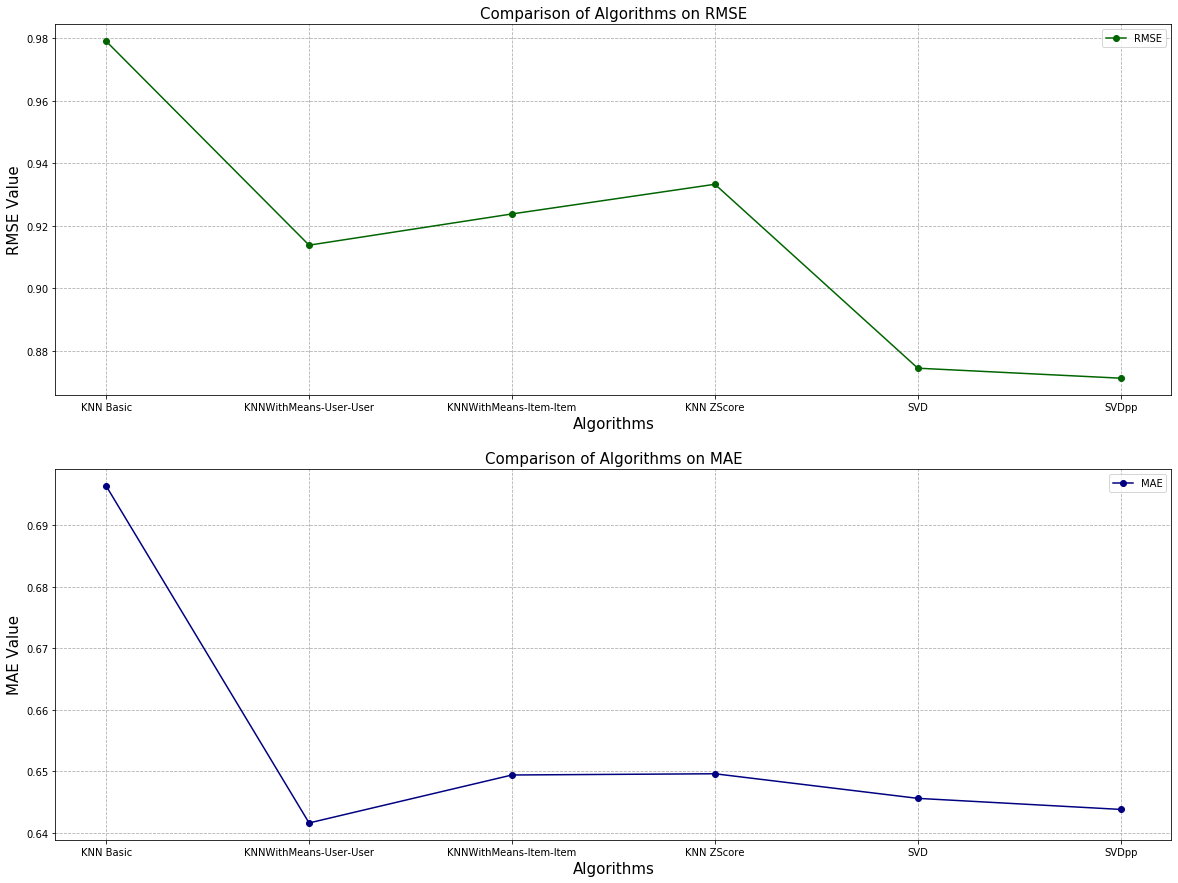

,Model,RMSE,MAE,Fit Time,Test Time
0,SVD,0.874356,0.645638,2.054749,0.063246
1,SVDpp,0.871246,0.643800,22.819758,0.415092
2,KNNBasic,0.979076,0.696389,0.807133,0.482763
3,KNNWithZScore,0.933315,0.649573,0.909765,0.544317
4,KNNWithMeans User-User,0.913782,0.641577,0.454319,0.388642
5,KNNWithMeans Item-Item,0.923825,0.649447,0.824487,0.511338


In [56]:
x_algo = ['KNN Basic', 'KNNWithMeans-User-User', 'KNNWithMeans-Item-Item', 'KNN ZScore', 'SVD', 'SVDpp']
all_algos_cv = [knnBasic_cv, knnMeansUU_cv, knnMeansII_cv, knnZscore_cv, svd_cv, svdpp_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv  = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,15))

plt.subplot(2, 1, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(2, 1, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

cv_results

## Evaluation Results :-

From above algorithm comparisons plots we can infer the followings:
- RMSE : we can see that SVD++ is giving the best RMSE value with parameters {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4} and SVD is giving the second best RMSE with parameters {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}
- MAE : Here SVD++ and KNNWithMeans both are giving the best MAE value.
- Svd++ is having the best RMSE in Matrix Factorization Based Algorithms.
- KNNWithMeans is giving the best RMSE in Collaborative Filtering Algorithms.
- <b> Important : </b> If compare SVD and SVD++ then can notice that RMSE and MAE value of SVD is slightly differs from the SVD++ but the Fit Time and Test Time taken by SVD is significant less(12 times) than SVD++. So, we will proceed with SVD got get top-k recommendations


## top - K ( K = 5) recommendations ::-

- Here I am using SVD algorithm to get the top 5 recommendations of new products for each user.

In [57]:
top_n = defaultdict(list)
def get_top_n(predictions, n=k):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions_svd, n=k)
top_n

defaultdict(list,
            {'AZBXKUH4AIW3X': [('B00316263Y', 4.7480782899570375),
              ('B00029U1DK', 4.746210691160995),
              ('B005LDLP8W', 4.696924550046527),
              ('B0058UUR6E', 4.684746124690159),
              ('B008EQZ25K', 4.674743332149897)],
             'A1T1YSCDW0PD25': [('B004S4R5CK', 4.878322948988487),
              ('B0099SMFVQ', 4.796879258304915),
              ('B0002SQ2P2', 4.7638243426688245),
              ('B000CKVOOY', 4.748726165646956),
              ('B000AZ57M6', 4.744743366383081)],
             'A1HYH206E18XVC': [('B006EKIQYM', 4.530550850637532),
              ('B00CE590Z0', 4.2468826751735715),
              ('B003YKG2UK', 4.241508930961824),
              ('B005DM9BGE', 4.236347685684107),
              ('B002VPE1XY', 3.9952730890511643)],
             'A2ZFFSJ0VM6KSJ': [('B008AST7R6', 4.90055268971409),
              ('B00AAIPT76', 4.82245488886919),
              ('B005DOK8NW', 4.7455903836250775),
              ('B00CDS9

<b> Comment : </b> From the above list we can see that model is recommending top 5 products to each user. There are some cases which  it recommends less than 5 products. It happend becaus model is not able to find appropriate number of neighbours.

### => Precision and recall at k=5

In [58]:
def precision_recall_at_k(predictions, k=5, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


kf = KFold(n_splits=5)
svd_model = SVD(n_epochs=20, lr_all=0.005, reg_all=0.2)
precs = []
recalls = []

for trainset, testset in kf.split(surprise_data):
    svd_model.fit(trainset)
    predictions = svd_model.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.5)

    # Precision and recall can then be averaged over all users
    print('Precision : ', sum(prec for prec in precisions.values()) / len(precisions))
    print('recalls : ',sum(rec for rec in recalls.values()) / len(recalls))


Precision :  0.8658413571756054
recalls :  0.8335854098486439
Precision :  0.8697909487709605
recalls :  0.8256507598609915
Precision :  0.8665070679434554
recalls :  0.826127516325878
Precision :  0.8740152038700738
recalls :  0.8320981100851624
Precision :  0.8774781005071444
recalls :  0.829457862615307


<b>Comment : </b> I have calculated Precision and recall at k=5. As we know that Precision and recall are binary metrics used to evaluate models with binary output. Thus we need a way to translate our numerical problem (ratings usually from 1 to 5) into a binary problem (relevant and not relevant items). To do the translation I have assumed that any true rating above 3.5 corresponds to a <b>relevant</b> item and any true rating below 3.5 is <b>irrelevant</b>. 
- My precision at 5 in a top-5 recommendation problem is alomost 87%. This means that 87% of the recommendation are relevent to the users.
- My recall at 5 in a top-5 recommendation problem is almost 83%. This means that 83% of the total number of the relevent products appear in the top-k result.

## Summary ::-

<b>Insight : </b>
- I Have done EDA to understand the data in precise way and found that most of the custermors have given 5 rating. Which gives us an important information that Amazon is performing good in tems of Electronics Products sell.  
- Taken the subset of data based on users who have given 50 or more rating and the products which recieved 10 or more number of ratings to overcome the Grey ship problem.
- In <b>Popularity Model</b> I have shown the top 5 recommended products irrespective of users. This means same top 5 products will be recommended to each user.
- I have used 'Matrix Factorization Based Algorithms' & 'k-NN Based Algorithms' to build <b>Collaborative Filtering model</b>.
- We have also seen that KNNWithMeans is performing well compare to other k-NN Based Algorithms.
- I found that SVD++ has given lowest RMSE which is slightly better than SVD but computational time of SVD++ is 12 times greater than SVD. Hence I have consider SVD to get the recommended products.
    - SVD with parameters   => Number of Epochs = 20, Learning Rate= 0.005, Regularization Term = 0.2
    - SVD++ with parameters => Number of Epochs = 25, Learning Rate= 0.01, Regularization Term = 0.4
- I have computed the precision which is almost 87%. Here we can interpret that 87% of my recommendations are actually relevant to the user.
- In recall we can interpret that 83% percent of the relevant items were recommended in the top-k items.